In [52]:
import gymnasium as gym
from gymnasium.wrappers.vector import NumpyToTorch
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [53]:
env = gym.make_vec(
    'CartPole-v1', 
    num_envs = 4, 
)
env = NumpyToTorch(env, device = device)

Checking out environments

In [54]:
env.observation_space

Box([[-4.8               -inf -0.41887903        -inf]
 [-4.8               -inf -0.41887903        -inf]
 [-4.8               -inf -0.41887903        -inf]
 [-4.8               -inf -0.41887903        -inf]], [[4.8               inf 0.41887903        inf]
 [4.8               inf 0.41887903        inf]
 [4.8               inf 0.41887903        inf]
 [4.8               inf 0.41887903        inf]], (4, 4), float32)

In [55]:
obs_sample = env.observation_space.sample()
obs_sample

array([[-1.173075  ,  0.22763254, -0.22163169,  1.3995109 ],
       [ 1.096007  , -1.97689   , -0.29131114, -0.62676555],
       [-0.13612396, -0.15669058, -0.0885221 ,  0.81459314],
       [-1.613287  , -0.66828775,  0.36251318,  0.6611499 ]],
      dtype=float32)

In [56]:
obs_sample.shape

(4, 4)

In [57]:
env.action_space

MultiDiscrete([2 2 2 2])

In [58]:
actions_sample = env.action_space.sample()
actions_sample

array([0, 0, 0, 1])

In [59]:
states, info = env.reset()
states

tensor([[-0.0397, -0.0035, -0.0203,  0.0022],
        [-0.0367, -0.0484, -0.0081,  0.0435],
        [-0.0277,  0.0064, -0.0469,  0.0068],
        [-0.0300,  0.0179,  0.0409,  0.0463]], device='cuda:0')

In [60]:
next_states, rewards, dones, terminated, _ = env.step(actions_sample)

In [61]:
next_states

tensor([[-0.0398, -0.1983, -0.0202,  0.2885],
        [-0.0377, -0.2434, -0.0073,  0.3336],
        [-0.0276, -0.1880, -0.0468,  0.2843],
        [-0.0296,  0.2124,  0.0418, -0.2332]], device='cuda:0')

In [62]:
rewards

tensor([1., 1., 1., 1.], device='cuda:0')

In [63]:
dones # done is when state successfully finished or passed

tensor([False, False, False, False], device='cuda:0')

In [64]:
# test_dones = torch.from_numpy(dones)
# for i in range(test_dones.size().numel()):
#     print(test_dones[i])

In [65]:
terminated # terminated is when agent failed 

tensor([False, False, False, False], device='cuda:0')

Setting up networks

In [66]:
import random
import numpy as np
from src.ppo import *

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [67]:
actor = Actor(4, 2, 64).to(device)
critic = Critic(4, 1, 64).to(device)

In [68]:
obs_sample = torch.from_numpy(obs_sample).to(device)
dist = actor.forward(obs_sample)
dist

Categorical(logits: torch.Size([4, 2]))

In [69]:
test_sample = dist.sample()

In [70]:
dist.log_prob(test_sample)

tensor([-0.7003, -0.7517, -0.6674, -0.6854], device='cuda:0',
       grad_fn=<SqueezeBackward1>)

In [71]:
dist.log_prob(test_sample).exp()

tensor([0.4965, 0.4716, 0.5131, 0.5039], device='cuda:0',
       grad_fn=<ExpBackward0>)

In [72]:
critic.forward(obs_sample)

tensor([[-0.2082],
        [-0.2582],
        [-0.1629],
        [-0.2144]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [73]:
# agent = Agent(actor, critic, 0.2, 0.99, 0.8, 0.5, 0.01, 0.0003, 0.0003, device, 8)
agent = Agent(actor, critic, 0.2, 0.99, 0.95, 0.5, 0.01, 0.0003, 0.001, device, 64)

In [74]:
train(env, agent, 100, 512, 4, 'models/cartpole_agent.pt', True)

finished episode: 0
total reward: 1956.0
number of steps: 512
---------------
new best model... saving...
finished episode: 1
total reward: 1966.0
number of steps: 512
---------------
new best model... saving...
finished episode: 2
total reward: 1991.0
number of steps: 512
---------------
new best model... saving...
finished episode: 3
total reward: 2007.0
number of steps: 512
---------------
new best model... saving...
finished episode: 4
total reward: 2022.0
number of steps: 512
---------------
new best model... saving...
finished episode: 5
total reward: 2019.0
number of steps: 512
---------------
finished episode: 6
total reward: 2019.0
number of steps: 512
---------------
finished episode: 7
total reward: 2021.0
number of steps: 512
---------------
finished episode: 8
total reward: 2030.0
number of steps: 512
---------------
new best model... saving...
finished episode: 9
total reward: 2030.0
number of steps: 512
---------------
finished episode: 10
total reward: 2034.0
number of 

Text(0, 0.5, 'reward')

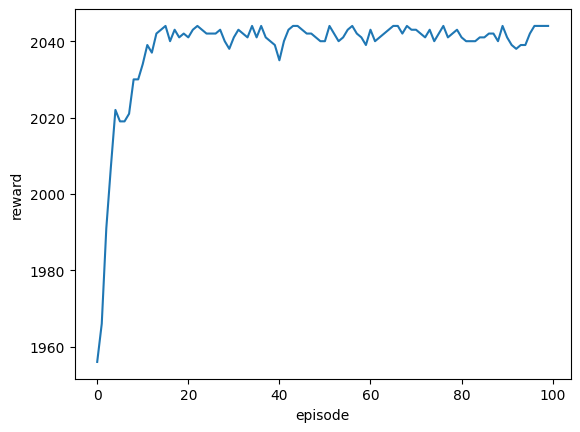

In [75]:
import matplotlib.pyplot as plt
plt.plot(agent.all_rewards)
plt.xlabel('episode')
plt.ylabel('reward')    

In [76]:
env.close()